# Sun as a Black Body - Spectrum

The Sun can be modelled as a black body. Then Sun's spectra follows Plank's law. The code below is a comparison of this black body spectrum with the observed spectrum data.

Import necessary python packages

In [43]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as mpl
from scipy.constants import k,h,c
import pandas as pd

## Download the spectrum 

Assume the the incident light intensity and spectrum is NREL AM1.5G spectrum, which approximates the light coming from the sun at a typical latitude. The data can be downloaded from NREL website: https://www.nrel.gov .

In [44]:
dataframe = pd.read_excel('https://www.nrel.gov/grid/solar-resource/assets/data/astmg173.xls')

array_download = np.array(dataframe)

# wavelength is in column 1, radiance is in column 2.
wl_array = array_download[1:, 0]
radiance_array = array_download[1:, 1]

print('wl_array : ',wl_array)
print('irradiance_array : ',radiance_array)

wl_array :  [280 280.5 281 ... 3990 3995 4000]
irradiance_array :  [0.082 0.099 0.15 ... 0.00878 0.0087 0.00868]


Text(0, 0.5, 'Radiance (W/m^2/nm)')

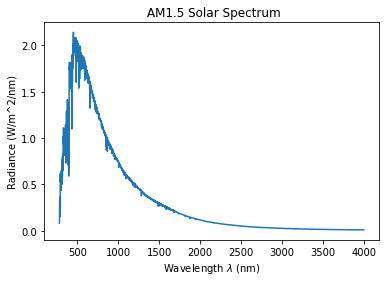

In [45]:
mpl.plot(wl_array, radiance_array)
mpl.title(' AM1.5 Solar Spectrum')
mpl.xlabel('Wavelength $\lambda$ (nm)')
mpl.ylabel('Radiance (W/m^2/nm)')

Wavelength is in nanometer and radiance is in W/m^2/nm

## Black Body Model

### Plank's Equation

The radiation produced by a Black body will obey Plank's radiation law.
Hence spectral radiance,(energy emitted by a given surface, per unit solid angle per unit projected area per unit wavelength) as a function of wavelength can be written as:

\begin{equation}
 B(\lambda ,T) = \frac{2hc^2}{\lambda ^5} \frac{1}{e^{\frac{hc}{k_B T}} - 1 }
\end{equation}

This is the power per square metre of the Sun's surface, per unit solid angle, per unit wavelength in metre.


### All Solid Angles

We need the radiance for all the solid angles. So we need do integrate this equation through all solid angles.
This will produce a factor of  $ \pi $ in the equation. Hence the equation becomes,
\begin{equation}
 B(\lambda ,T) = \frac{2\pi hc^2}{\lambda ^5} \frac{1}{e^{\frac{hc}{k_B T}} - 1 }
\end{equation}

Now this is the power per square metre of the Sun's surface, per unit wavelength in metre.

### All of Sun's surface

This is still only the power from square metre of the Sun's surface. To get the total power from the sun, we have to multiply by Sun's surface area.

\begin{equation}
P_{total} = B\:(4\pi R_{sun}^2)
\end{equation}

### Radiance at Sun-Earth Distance

$ P_{total}$ is the power at the surface of the Sun. But by the time it reach Earth, it will reduce in intensity.
So we need to find the power at Earth's position. Hence we divide by the area of the sphere with the radius of the Earth-Sun distance.

\begin{align}
P_{Earth} &= \frac{P_{total}}{4\pi R_{E-S}^2}\\
P_{Earth} &= B\left( \frac{R_{sun}}{R_{E-S}}\right)^2 
\end{align}

$\left( \frac{R_{sun}}{R_{E-S}}\right)^2 = 2.17 * 10^{-5} $


Define the function:

In [46]:
def BB_radiation(wl,T):
    wl *= 1e-9 # convert nm to m
    E_over_kT = h * c / (wl * k * T)
    B = (2.17*1e-5)* ( 2 * np.pi * h * c**2) * (1/( wl**5 * (np.exp(E_over_kT) - 1) ))
    ''' After calculation power per meter must be converted to power per nm'''
    return B*1e-9

make an array of all black body radiance values for every wavelength in wl_array

In [47]:
T = 5800 # in Kelvin

BB_spectrum = np.array([BB_radiation(wl, T) for wl in wl_array])

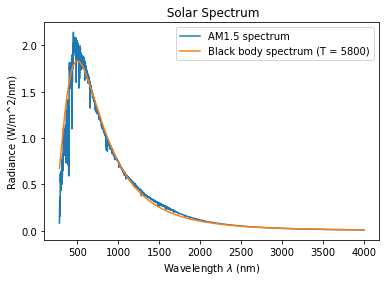

In [48]:
mpl.plot(wl_array, radiance_array,label = 'AM1.5 spectrum')
mpl.plot(wl_array, BB_spectrum, label = 'Black body spectrum (T = 5800)')
mpl.title(' Solar Spectrum')
mpl.xlabel('Wavelength $\lambda$ (nm)')
mpl.ylabel('Radiance (W/m^2/nm)')
mpl.legend(loc = 'upper right')